In [2]:
import numpy as np


In [3]:

X1=np.random.multivariate_normal([5,5],[[1,0],[0,1]],size=100)
Y=np.random.choice([1],100)
X2=np.random.multivariate_normal([0,0],[[1,0],[0,1]],size=100)
X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((Y,-Y))
print(Y)


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [4]:



def svm_sgd(X,Y):
    w=np.random.normal(0,1,size=2)
    eta=0.01
    b=0
    epochs=10000
    
    for epoch in range(epochs):
        lamb=1/(epoch+1)
        #decaying
        for i,x in enumerate(X):
            if(Y[i]*(np.dot(X[i],w)+b)<1):
                w=w+eta*(Y[i]*X[i]-2*lamb*w)
                b=b+eta*Y[i]
            else:
                w=w+eta*(-2*lamb*w)
    return w,b            
w,b=svm_sgd(X,Y)
print(w,b)

[ 0.72266937  0.4311794 ] -2.91


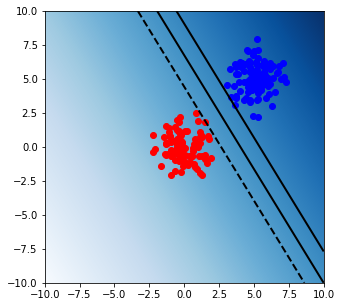

In [5]:
import matplotlib.pyplot as plt

def evaluate_svm(weight,bias,point):
    return np.dot(weight,point)+bias
#def plot_svm():
xx, yy = np.meshgrid(np.linspace(-10, 10, 5000),
                         np.linspace(-10, 10, 1000))
Z=[evaluate_svm(w,b,np.array([xxx,yyy])) for xxx,yyy in zip(xx,yy)]

cmap = plt.cm.Blues
plt.figure(figsize=(5,5))

plt.imshow(Z,
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                aspect='auto', origin='lower', cmap=cmap)
plt.contour(xx, yy, Z, levels=[-1,0,1], linewidths=2,
                colors='k')

colrs={1:'b',-1:'r'}
for i,x in enumerate(X):
    plt.scatter(x[0],x[1],color=colrs[Y[i]])
plt.show()